In [134]:
from sklearn.datasets import load_iris
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

In [108]:
(X,y) = load_iris(return_X_y=True)

In [109]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [110]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [173]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=1)

In [174]:
def get_categoria(indice):
	return y_train[indice]

In [175]:
def calcula_knn(p1,p2):
    return math.sqrt(np.sum(np.square(p1-p2)))

In [176]:
def sort_by_value(val): 
    return val[1]

In [203]:
def calcula_todos_knn(p1):
    diffs =[]
    for i,iris in enumerate(X_train):
        diffs.append([i,calcula_knn(p1,iris),get_categoria(i)])
    diffs.sort(key=sort_by_value)
    return diffs

In [204]:
def classificar(p1,k):
    diffs = calcula_todos_knn(p1)
    visinhos = diffs[0:k]
    
    categorias =[0,0,0]
    for v in visinhos:
        if v[2] == 0:
            categorias[0]+=1
        elif v[2] == 1:
            categorias[1]+=1
        else:
            categorias[2]+=1
            
    return [visinhos,np.argmax(categorias)]

In [205]:
def classificar_todos(X_train, y_train, X_test,k):
    labelsResults = []

    for i in range(len(X_test)):
         labelsResults.append(classificar(X_test[i,:],k)[1])
            
    return labelsResults

In [130]:
#def k_nearest_neighbor(X_train, y_train, X_test, k):
#   predictions = []
#   for i in range(len(X_test)):
#       predictions.append(predict(X_train, y_train, X_test[i, :], k))
#   return np.asarray(predictions)

In [131]:
#def predict(X_train, y_train, x_test, k):
#   distances = []
#   targets = []
#   for i in range(len(X_train)):
#       distances.append([np.square(x_test - X_train[i, :]).sum(), i])
#   distances = sorted(distances)
#   for i in range(k):
#       index = distances[i][1]
#       targets.append(y_train[index])
#   return Counter(targets).most_common(1)[0][0]


In [209]:
data = classificar([5.2, 2. , 1.2, 1.3],5)
data

[[[72, 1.2609520212918492, 0],
  [18, 1.4832396974191326, 0],
  [98, 1.5297058540778354, 0],
  [110, 1.5524174696260025, 0],
  [59, 1.6093476939431082, 0]],
 0]

In [210]:
for d in data[0]:
    print(d[0],d[1])

72 1.2609520212918492
18 1.4832396974191326
98 1.5297058540778354
110 1.5524174696260025
59 1.6093476939431082


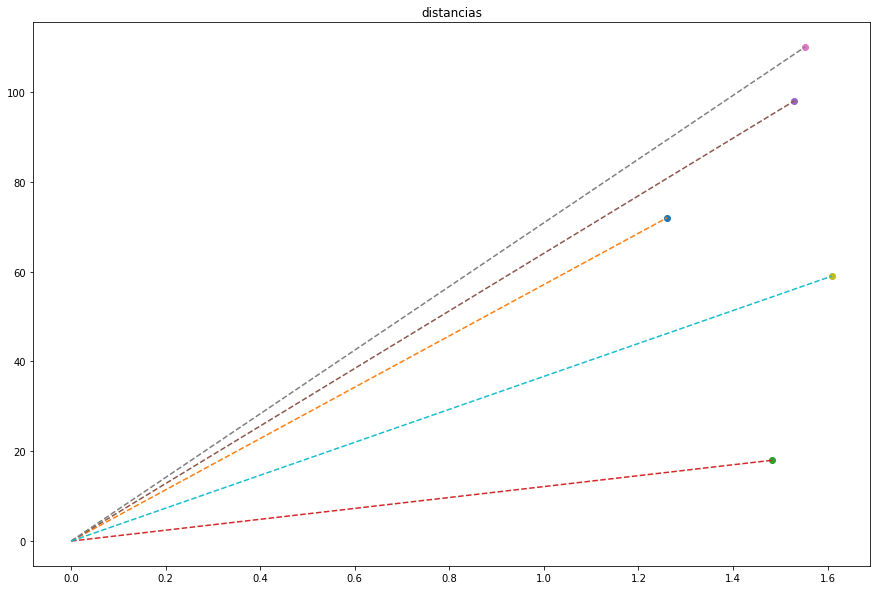

In [211]:
fig, ax = plt.subplots(figsize=(15,10))

for d in data[0]:
    ax.plot(d[1],d[0], 'o')
    plt.plot([0,d[1]],[0,d[0]], '--')
        
ax.set_title('distancias')
    
plt.show()

In [212]:


labelsResults = classificar_todos(X_train, y_train, X_test,5)
        

In [213]:
print('Score:', accuracy_score(y_test, labelsResults))

Score: 1.0


In [214]:
print(labelsResults)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2]


In [215]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [217]:
classificar(X[70,:],5)

[[[84, 0.0, 1],
  [42, 0.22360679774997896, 2],
  [37, 0.2999999999999998, 2],
  [57, 0.3605551275463989, 2],
  [27, 0.4242640687119282, 1]],
 2]

In [48]:
classificar(X[138,:])

[[[138, 0.0, 2],
  [127, 0.14142135623730964, 2],
  [70, 0.22360679774997896, 1],
  [126, 0.2828427124746193, 2],
  [149, 0.31622776601683766, 2]],
 2]

In [199]:
calcula_todos_knn(X[70])

[[29, 711.01, 1]]

In [135]:
predict(X, y, X[70], 5)

2